In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [2]:
income_ineq = pd.read_csv('estonia_inequality_data.csv')
internet_acc = pd.read_csv('est_internet_data.csv')

In [3]:
group_df = internet_acc
group_df['income_inequality'] = income_ineq

In [4]:
group_df.head()

,Internet,income_inequality
0,2.779,0.55
1,3.525,0.52
2,5.706,0.52
3,10.796,0.53
4,14.501,0.54


In [5]:
group_df.describe()

,Internet,income_inequality
count,25.000000,25.000000
mean,56.302400,0.509200
std,30.381679,0.035464
min,2.779000,0.450000
25%,31.528000,0.480000
50%,66.190000,0.510000
75%,80.004000,0.540000
max,89.532000,0.570000


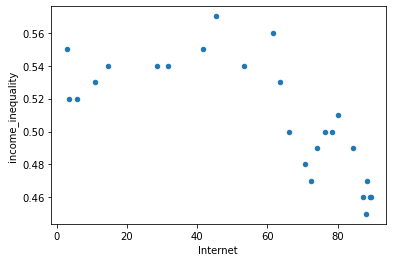

In [6]:
group_df.plot(kind='scatter',x='Internet ', y='income_inequality')
plt.show()

In [7]:
income_ineq = group_df['income_inequality'].to_frame()

In [8]:
group_df = group_df.drop(['income_inequality'], axis = 1)

In [9]:
group_df.head()

,Internet
0,2.779
1,3.525
2,5.706
3,10.796
4,14.501


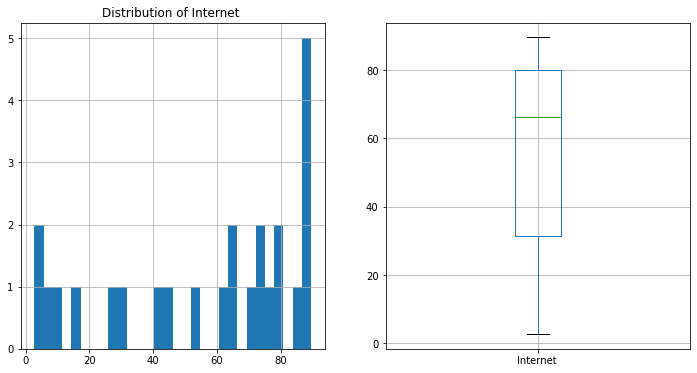

In [10]:
for col in group_df.columns:
    f, axes = plt.subplots(1,2,figsize=(12,6))
    group_df[col].hist(bins = 30, ax = axes[0])
    axes[0].set_title('Distribution of '+ col)
    group_df.boxplot(column = col, ax = axes[1])
    plt.show()

How to plot a boxplot using data in a Pandas Dataframe

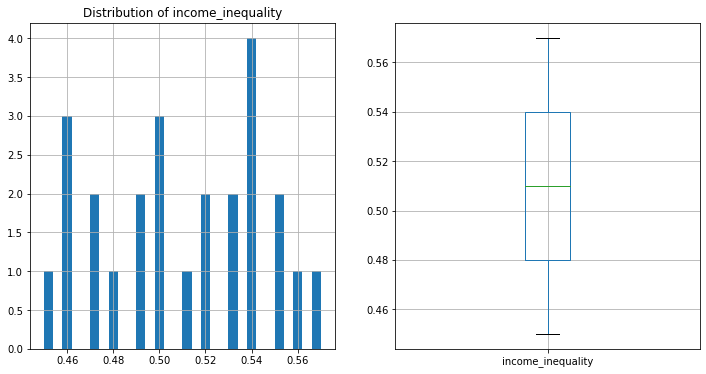

In [11]:
for col in income_ineq.columns:
    f, axes = plt.subplots(1,2,figsize=(12,6))
    income_ineq[col].hist(bins = 30, ax = axes[0])
    axes[0].set_title('Distribution of '+ col)
    income_ineq.boxplot(column = col, ax = axes[1])
    plt.show()

In [21]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(group_df, income_ineq, test_size = 0.2, 
                                                                    random_state = 5)

print('Training Set:')
print('Number of datapoints: ', X_train.shape[0])
print('Number of features: ', X_train.shape[1])
print('\n')
print('Test Set:')
print('Number of datapoints: ', X_test.shape[0])
print('Number of features: ', X_test.shape[1])

Training Set:
Number of datapoints:  20
Number of features:  1


Test Set:
Number of datapoints:  5
Number of features:  1


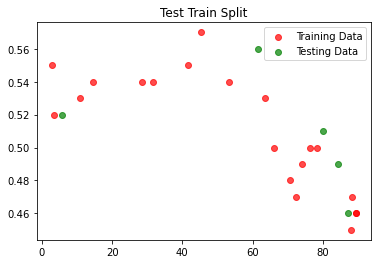

In [16]:
plt.scatter(X_train, Y_train, label='Training Data', color='r',alpha = .7)
plt.scatter(X_test, Y_test, label='Testing Data', color='g',alpha = .7)
plt.legend()
plt.title('Test Train Split')
plt.show()

In [17]:
numeric_columns = ['Internet ']
def scale_numeric(data, numeric_columns, scaler):
    for col in numeric_columns:
        data[col] = scaler.fit_transform(data[col].values.reshape(-1,1))
    return data

In [18]:
scaler = StandardScaler()
X_train = scale_numeric(X_train.copy(), numeric_columns, scaler)
X_test = scale_numeric(X_test.copy(), numeric_columns, scaler)
Y_train = scaler.fit_transform(Y_train.copy().values.reshape(-1,1))
Y_test = scaler.fit_transform(Y_test.copy().values.reshape(-1,1))


In [19]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
Y_pred = lm.predict(X_test)

Mean Squared Error:  0.9011363693367105
Mean Absolute Error  0.7963735461413997
R^2:  0.09886363066328951


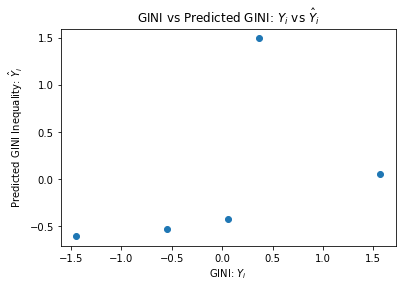

In [20]:
def evaluate(Y_test, Y_pred):
    mse = metrics.mean_squared_error(Y_test, Y_pred)
    msa = metrics.mean_absolute_error(Y_test, Y_pred)
    r2 = metrics.r2_score(Y_test, Y_pred)

    print('Mean Squared Error: ', mse)
    print('Mean Absolute Error ', msa)
    print('R^2: ', r2)
    
    plt.scatter(Y_test, Y_pred)
    plt.xlabel("GINI: $Y_i$")
    plt.ylabel("Predicted GINI Inequality: $\hat{Y}_i$")
    plt.title("GINI vs Predicted GINI: $Y_i$ vs $\hat{Y}_i$")

evaluate(Y_test, Y_pred)
